#Momento de Retroalimentación: Módulo 5 Preprocesamiento de datos multivariados o de una serie temporal
##José María Ibarra A01706970
##Inteligencia artificial avanzada para la ciencia de datos II


#I. Análisis de homocedasticidad, tendencia y estacionalidad

In [ ]:
#librerías

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#datos

X = pd.read_csv('/content/drive/MyDrive/ITESM/IA avanzada VII/B2/B1 M5/Alcohol_Sales.csv')
X.rename(columns={'DATE':'date','S4248SM144NCEN':'sale'}, inplace=True)
print('shape:',X.shape)
X.head()

shape: (325, 2)


,date,sale
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


<Axes: >

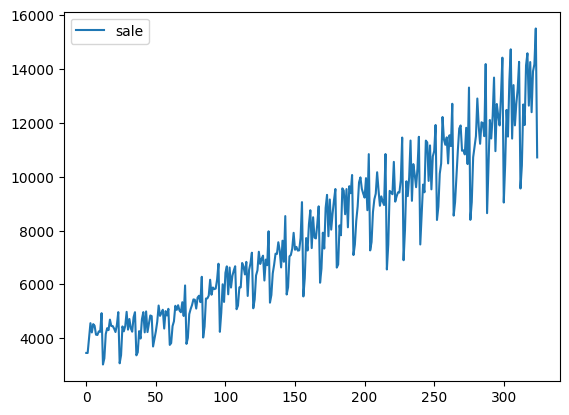

In [ ]:
#visualización de la serie de tiempo

X.plot()

Podemos observar una tendencia positiva en los datos, además de que se puede observar también una periodicidad o estacionalidad a lo largo de esa tendencia. Además, se muestra que tiene cambios en la varabilidad de los datos en medida que la serie avanza.

Aunque es visualmente evidente que la serie no es estacionaria, podemos ver gráficos y aplicar un par de pruebas de hipótesis: prueba de Dickey-Fuller y prueba de Kwiatkowski-Phillips-Schmidt-Shin (KPSS), que nos sirven para respaldar significativamente la afirmación, o desmentirla.

<Axes: >

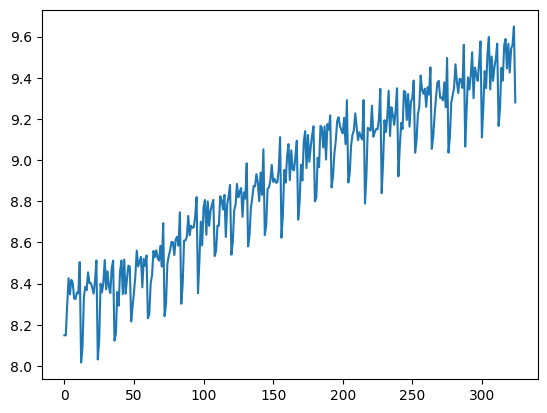

In [ ]:
#tranformación logarítmica

X = np.log(X.sale)
X.plot()

Podemos observar los gráficos de CAF y PACF para ver la naturaleza de la serie.

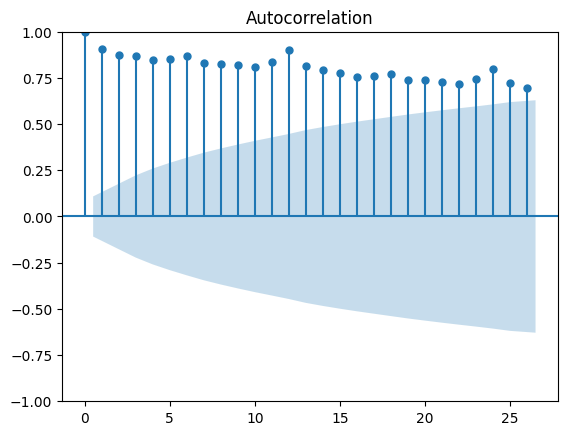

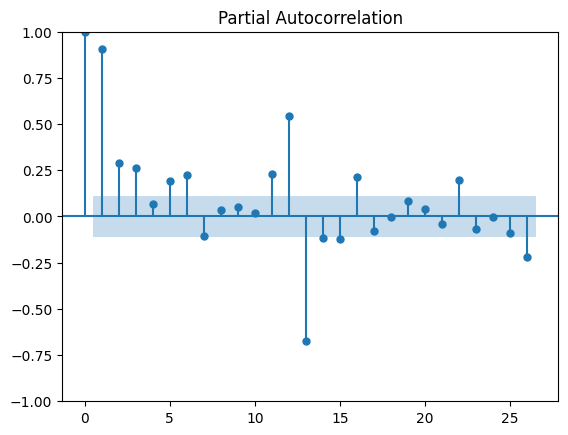

In [ ]:
#ACF & PACF

acf_X = plot_acf(X)
pacf_X = plot_pacf(X)

Podemos ver que los valores de autocorrelación no decaen, lo que es indicio de no estacionalidad.

In [ ]:
#funciones para pruebas de hipótesis

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()

    print('-'*200)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    alpha = 0.05
    if dfoutput['p-value'] < alpha:
      print("La serie de tiempo es estacionaria (se rechaza la hipótesis nula)")
    else:
      print("La serie de tiempo no es estacionaria (no se rechaza la hipótesis nula)")

    print('-'*200)
    #kpss test:
    print('Results of kpss Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

    if kpss_output['p-value'] < alpha:
      print("La serie de tiempo no es estacionaria (no se rechaza la hipótesis nula)")
    else:
      print("La serie de tiempo es estacionaria (se rechaza la hipótesis nula)")
    print('-'*200)

Aplicamos las pruebas con un nivel de significancia *alpha* de 0.05.

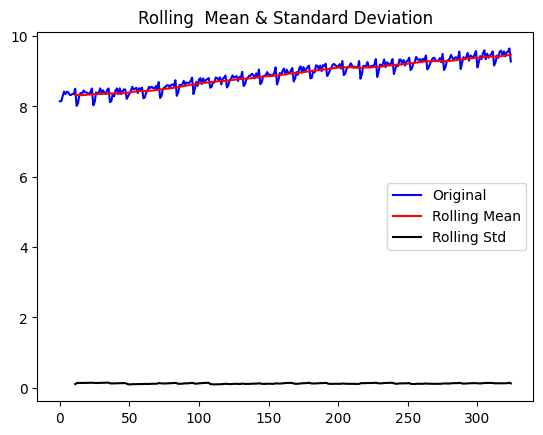

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -0.600478
p-value                          0.870874
#Lags Used                      14.000000
Number of Observations Used    310.000000
Critical Value (1%)             -3.451622
Critical Value (5%)             -2.870909
Critical Value (10%)            -2.571762
dtype: float64
La serie de tiempo no es estacionaria (no se rechaza la hipótesis nula)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Results of kpss Test:
Test Statistic            2.803618
p-value                   0.010000
#Lags Used               11.000000
Critical Value (10%)      0.347000
Critical Value (5%)     

<ipython-input-6-af4305c4ab31>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [ ]:
#pruebas

test_stationarity(X)

Luego de observar los resultados de ambas pruebas, podemos afirmar que la serie no es estacionaria. Esto porque la primera prueba presenta un p-value de 0.99, mayor a 0.05, por tanto no hay evidencia para rechazar la hipótesis nula, es decir, la serie no es estacionaria. Para el caso de la prueba KPSS, el p-value es considerablemente menor a 0.05, y existe evidencia para rechazar la hipótesis nula y afirmar que **la serie temporal no es estacionaria**.

Además de la clara **tendencia positiva**, también podemos ver que la desviación estándar de la serie tiende a crecer con el tiempo antes de aplicar la tranformación logarítmica, por lo que se puede decir que esta serie temporal **no es homocedástica**.

#II. Diferenciación

Es necesario para la construcción de un modelo ARIMA tener una serie de tiempo estacionaria. Una de las medidas que podemos tomar para obtener una serie estacionaria es diferenciar la serie original y corroborar de nuevo con las pruebas.

<Axes: >

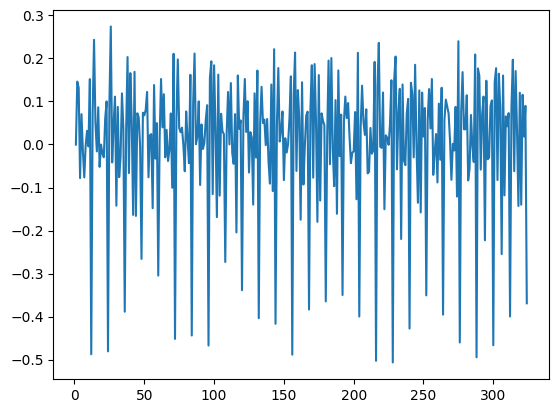

In [ ]:
#gráfica de diferencias

X_diff = X.diff().dropna()
X_diff.plot()

A primera vista parece ser una serie más estacionaria.

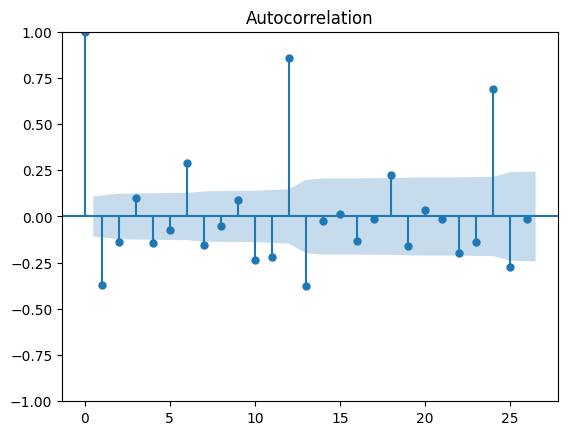

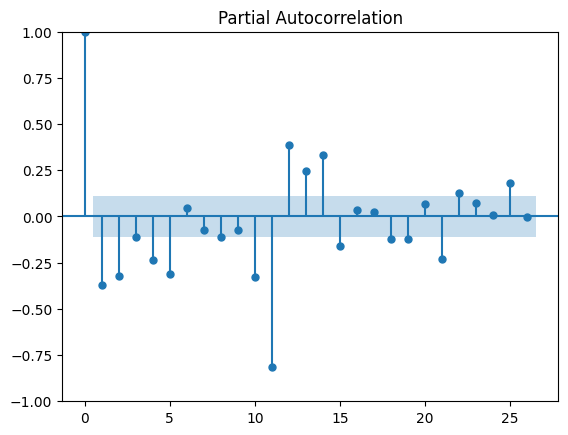

In [ ]:
#ACF & PACF

X_diff_acf = plot_acf(X_diff)
X_diff_pacf = plot_pacf(X_diff)

Podemos observar que las autocorrelaciones decaen rapidamente, pero es necesario hacer las pruebas para determinar correctamente la estacionalidad de la nueva serie temporal.

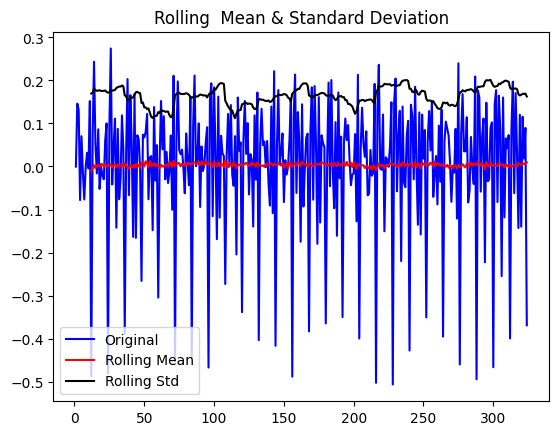

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -5.609648
p-value                          0.000001
#Lags Used                      13.000000
Number of Observations Used    310.000000
Critical Value (1%)             -3.451622
Critical Value (5%)             -2.870909
Critical Value (10%)            -2.571762
dtype: float64
La serie de tiempo es estacionaria (se rechaza la hipótesis nula)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Results of kpss Test:
Test Statistic            0.08696
p-value                   0.10000
#Lags Used               19.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300


<ipython-input-6-af4305c4ab31>:37: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [ ]:
#pruebas

test_stationarity(X_diff)

Podemos ver que ambas pruebas indican que existe evidencia para decir que **la serie temporal es estacionaria**, por lo que podemos avanzar a determinar qué tipo de serie es y proponer un modelo ARIMA.

#III. Determinar coeficientes *p* y *q* para modelo ARIMA

Para determinar el orden del modelo ARIMA, observamos de nuevo los gráficos de ACF y PACF.

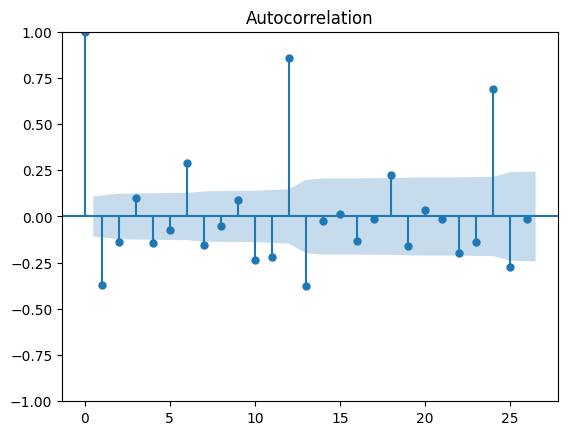

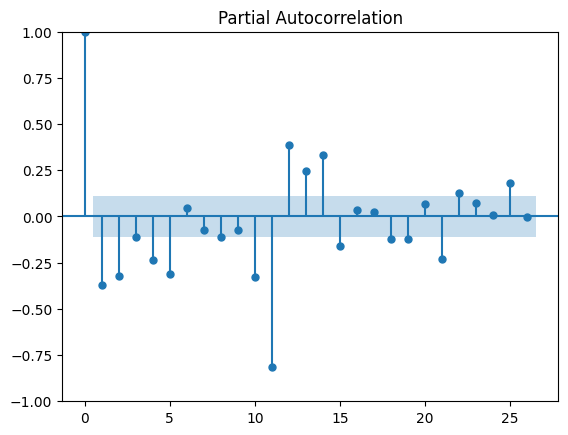

In [ ]:
#ACF & PACF

X_diff_acf = plot_acf(X_diff)
X_diff_pacf = plot_pacf(X_diff)

Aplicamos una prueba de Ljung-Box para confirmar la autocorrelación.

In [ ]:
#prueba de autocorrelación

from statsmodels.stats.diagnostic import acorr_ljungbox
m = int(np.log(X_diff.shape[0]))

acorr_ljungbox(X_diff, lags=[m])

,lb_stat,lb_pvalue
5,63.028307,2.872117e-12


La gráfica de autocorrelaciones indica el coeficiente para los promedios móviles, esto porque considera los rezagos entre dos observaciones. En este caso, podemos ver que el gráfico ACF tiene un valor significativo en *q*=1 y luego decae rápidamente. El gráfico PACF, que se centra en la auto-regresión del modelo, decae más lento.  Por esto, se propone un modelo ARIMA de orden (0, 1, 1)

#Momento de Retroalimentación: Módulo 5 Evaluación de un modelo y su aplicación para predicción

#I. Modelo ARIMA(0, 1, 1)

Modelamos con el orden previamente propuesto.

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.1 MB/s eta 0:00:00


In [ ]:
#librerías

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [ ]:
#fit del modelo

model1 = ARIMA(X, order=(0,1,1))
model_fit = model1.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   sale   No. Observations:                  325
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 204.157
Date:                Fri, 01 Dec 2023   AIC                           -404.314
Time:                        01:18:36   BIC                           -396.752
Sample:                             0   HQIC                          -401.295
                                - 325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8607      0.029    -29.697      0.000      -0.918      -0.804
sigma2         0.0165      0.002      9.722      0.000       0.013       0.020
Ljung-Box (L1) (Q):                   2.51   Jarque-

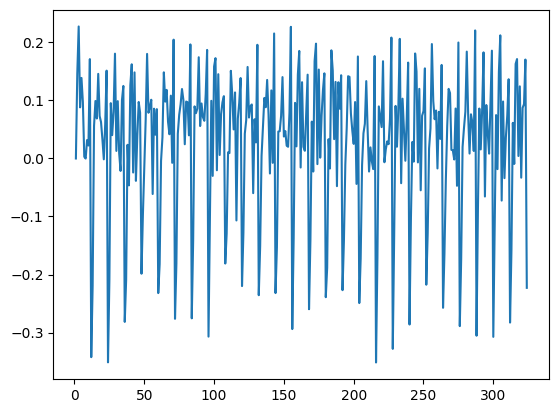

In [ ]:
#residuos del modelo

residuals1 = pd.DataFrame(model_fit.resid,columns=['res'])
plt.plot(residuals1[1:])
plt.show()


<Axes: ylabel='Density'>

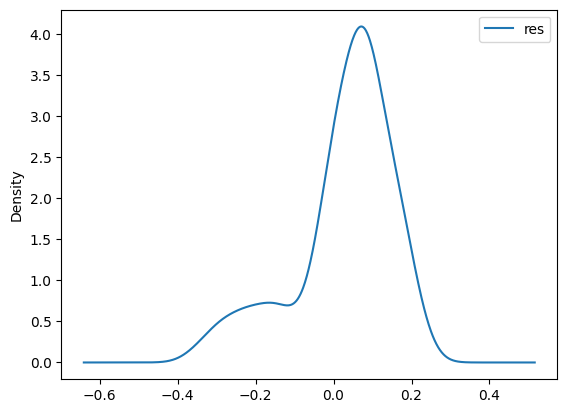

In [ ]:
#distribución de los residuos

residuals1[1:].plot(kind='kde')

In [ ]:
#error del modelo

residuals1['res2']=residuals1['res']*residuals1['res']
sse = residuals1['res2'].sum()
print('SSE=',sse)

SSE= 71.77622165695388


Podemos probar un segundo modelo con orden (1,1,1) para ver cuál tiene mejor desempeño.

In [ ]:
#fit del segundo modelo

model2 = ARIMA(X, order=(1,1,1))
model_fit2 = model2.fit()
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:                   sale   No. Observations:                  325
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 207.332
Date:                Fri, 01 Dec 2023   AIC                           -408.664
Time:                        01:18:38   BIC                           -397.322
Sample:                             0   HQIC                          -404.137
                                - 325                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1508      0.076      1.974      0.048       0.001       0.301
ma.L1         -0.8808      0.034    -25.838      0.000      -0.948      -0.814
sigma2         0.0162      0.002      9.871      0.0

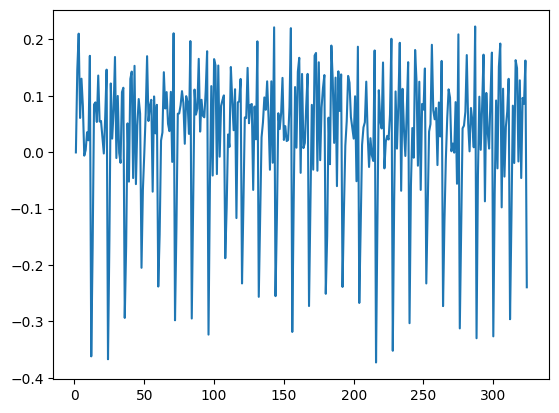

In [ ]:
#residuos del segundo modelo

residuals2 = pd.DataFrame(model_fit2.resid,columns=['res'])
plt.plot(residuals2[1:])
plt.show()


<Axes: ylabel='Density'>

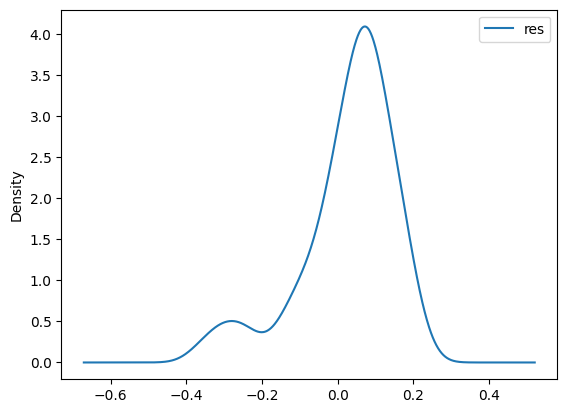

In [ ]:
#distribución

residuals2[1:].plot(kind='kde')

In [ ]:
#error del segundo modelo

residuals2['res2']=residuals2['res']*residuals2['res']
sse = residuals2['res2'].sum()
print('SSE=',sse)

SSE= 71.67222411765773


Podemos ver que de los dos, el mejor modelo es el segundo, el cual tiene un error (SSE) ligeramente menor y un valor de AIC menor, el cual refiere a la calidad del modelo considerando ajuste a los datos y complejidad del modelo.

Generamos predicciones con este modelo.

#II. Predicciones

In [ ]:
#split en train y test

X_train, X_test = train_test_split(X, test_size=0.2, train_size=0.8, shuffle=False)

<Axes: >

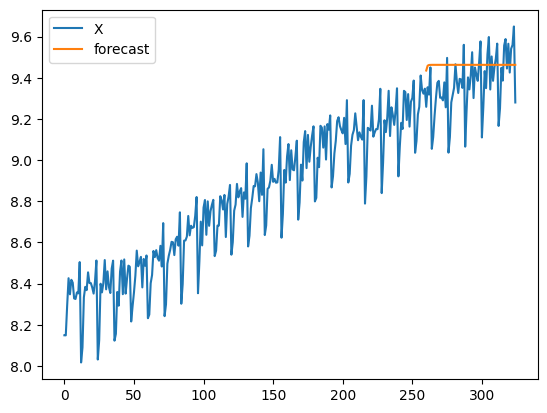

In [ ]:
#forecast

forecast = model_fit2.forecast(len(X_test))
series = pd.DataFrame()
series['X'] = X
series['forecast'] = [None]*len(X_train) + list(forecast)

series.plot()

Podemos ver que el modelo genera predicciones que no parecen ser muy buenas, lo que puede indicar que el modelo propuesto no es óptimo.

#III. Auto-ARIMA

Podemos utilizar la herramienta de Auto-ARIMA para encontrar un mejor modelo.

In [ ]:
#auto-ARIMA

from pmdarima.arima import auto_arima

auto_arima_model = auto_arima(X, trace=True, error_action='raise', stepwise=False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-271.971, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-433.538, Time=1.11 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-438.729, Time=1.50 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-439.330, Time=2.24 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-438.504, Time=2.85 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-463.392, Time=3.04 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-318.366, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-437.439, Time=0.93 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-438.595, Time=1.07 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-435.004, Time=1.64 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=-438.283, Time=2.38 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-352.729, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-438.684, Time=1.47 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-436.852, Time=3.03 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(3,1,0)(0

In [ ]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  325
Model:               SARIMAX(0, 1, 5)   Log Likelihood                 238.696
Date:                Fri, 01 Dec 2023   AIC                           -463.392
Time:                        01:40:51   BIC                           -436.927
Sample:                             0   HQIC                          -452.829
                                - 325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0036      0.001      5.969      0.000       0.002       0.005
ma.L1         -0.9766      0.047    -20.654      0.000      -1.069      -0.884
ma.L2         -0.1717      0.082     -2.090      0.037      -0.333      -0.011
ma.L3         -0.0334      0.129     -0.260      0.795      -0.285       0.219
ma.L4         -0.0083      0.115     -0.072      0.943      -0.234       0.217
ma.L5          0.2643      0.079      3.334      0.001       0.109       0.420
sigma2         0.0133      0.001     11.808      0.000       0.011       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                17.52
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.54
Prob(H) (two-sided):                  0.78   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

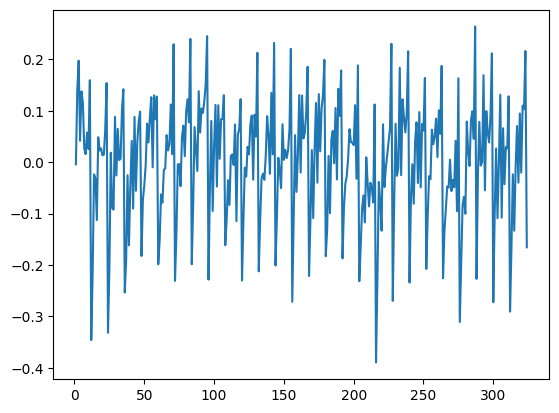

In [ ]:
#residuos

predicted_values = auto_arima_model.predict_in_sample()
residuals_auto = X - predicted_values
plt.plot(residuals_auto[1:])
plt.show()

<Axes: ylabel='Density'>

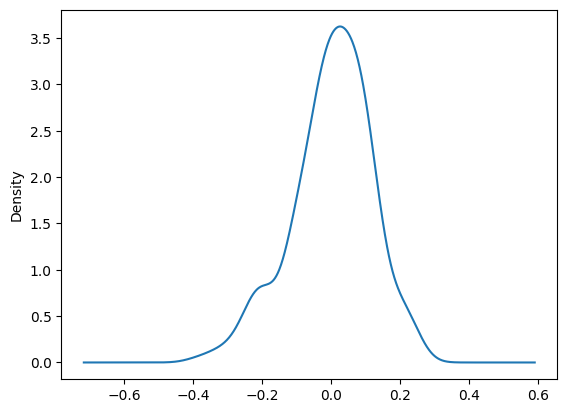

In [ ]:
#distribución

residuals_auto[1:].plot(kind='kde')

In [ ]:
#sse

sse = (residuals_auto ** 2).sum()
print("SSE:", sse)

SSE: 70.68647526123172


Podemos observar que el modelo encontrado sí parece tener una distribución aleatoria y normal en los residuos, y el error es menor que en los modelos anteriores.

#IV. Predicciones

<Axes: >

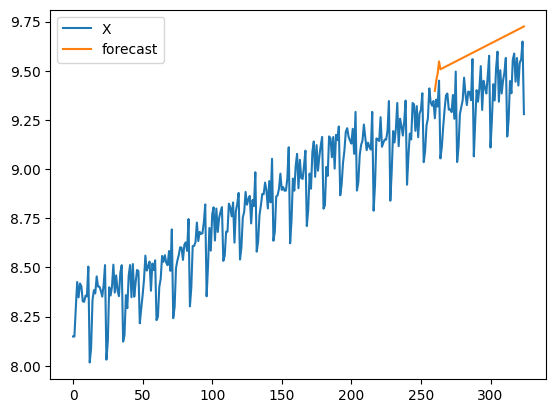

In [ ]:
#forecast

forecast = auto_arima_model.predict(len(X_test))
series = pd.DataFrame()
series['X'] = X
series['forecast'] = [None]*len(X_train) + list(forecast)

series.plot()

Podemos ver que las predicciones tienen más sentido con este modelo, pues siguen una tendencia más similar a la observada realmente. Sin embargo, parece que el modelo no captura correctamente el ruido de los datos. Esto podría explorarse más adelante con un estudio de estacionalidad.

#V. Estacionalidad

Para mejorar las predicciones hay que modelar nuestra serie de tiempo como un sistema SARIMA. Primero determinamos el mejor modelo estacional considerando 7 pasos por estación.

In [ ]:
auto_sarima_model = auto_arima(X, trace=True, error_action='raise', stepwise=False, seasonal=True, m=7)

 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-271.971, Time=0.14 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-278.345, Time=0.53 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=-277.002, Time=1.07 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-277.650, Time=0.54 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=inf, Time=3.23 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=-276.415, Time=0.62 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-433.538, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-441.844, Time=0.59 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=-448.683, Time=1.57 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=-439.910, Time=0.48 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=-456.056, Time=1.28 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=-441.305, Time=2.51 sec
 ARIMA(0,1,1)(2,0,0)[7] interc

In [ ]:
auto_sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  325
Model:             SARIMAX(0, 1, 4)x(1, 0, [], 7)   Log Likelihood                 238.863
Date:                            Fri, 01 Dec 2023   AIC                           -463.725
Time:                                    01:44:00   BIC                           -437.260
Sample:                                         0   HQIC                          -453.162
                                            - 325                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0048      0.001      6.443      0.000       0.003       0.006
ma.L1         -1.0016      0.053    -18.974      0.000      -1.105      -0.898
ma.L2         -0.3076      0.074     -4.131      0.000      -0.454      -0.162
ma.L3          0.1340      0.111      1.210      0.226      -0.083       0.351
ma.L4          0.2634      0.073      3.594      0.000       0.120       0.407
ar.S.L7       -0.3154      0.083     -3.802      0.000      -0.478      -0.153
sigma2         0.0132      0.001     11.089      0.000       0.011       0.015
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.27   Prob(JB):                         0.11
Heteroskedasticity (H):               1.04   Skew:                            -0.27
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

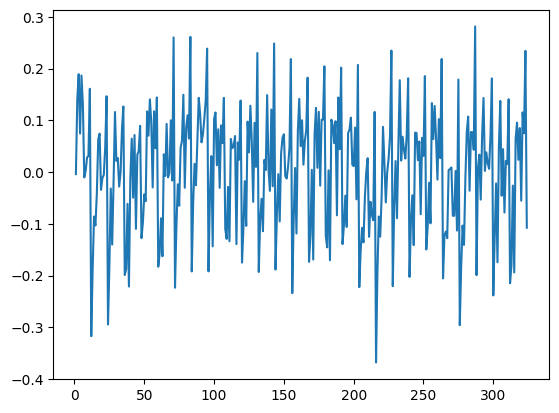

In [ ]:
#residuos

predicted_values = auto_sarima_model.predict_in_sample()
residuals_auto = X - predicted_values
plt.plot(residuals_auto[1:])
plt.show()

<Axes: ylabel='Density'>

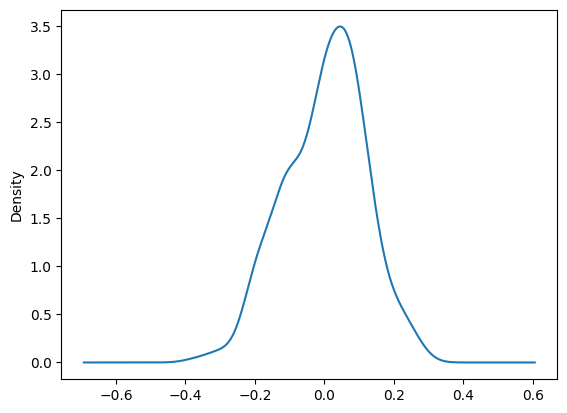

In [ ]:
#distribución

residuals_auto[1:].plot(kind='kde')

Vemos que la distribución cada mez se asemeja más a una normal.

<Axes: >

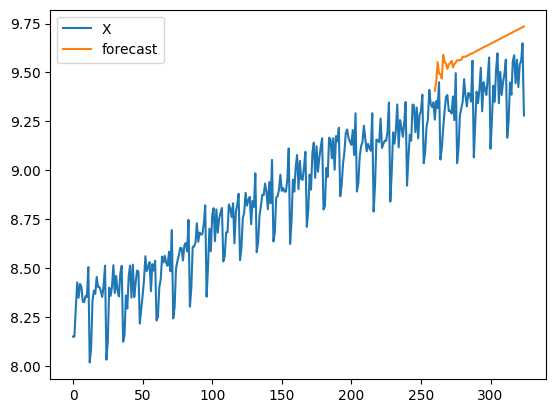

In [ ]:
#forecast

forecast = auto_sarima_model.predict(len(X_test))
series = pd.DataFrame()
series['X'] = X
series['forecast'] = [None]*len(X_train) + list(forecast)

series.plot()

Las predicciones se ven mejor pero a la larga no son buenas. Hagamos un modelo aparte con el orden encontrado.

In [ ]:
from statsmodels.tsa.api import SARIMAX
model = SARIMAX(X, order=(0, 1, 4),seasonal_order=(1,0,0,7))
res = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Axes: >

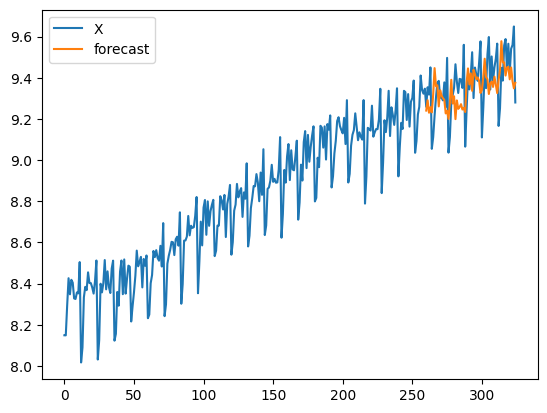

In [ ]:
#forecast

forecast = res.predict(start=X_test.index[0]+1, end=len(X))
series = pd.DataFrame()
series['X'] = X
series['forecast'] = [None]*len(X_train) + list(forecast)

series.plot()

Podemos ver que considerando la estacionalidad, las predicciones mejoran. Un estudiuo de regresores externos podría mejorar aún más nuestras predicciones.